In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
%matplotlib inline

In [2]:
#傅里叶近似 sqrt(),D in [-pi,pi]
y=0
t=np.linspace(-3*np.pi,3*np.pi,300)
for n in range(1,21,2):
    y+=(4/np.pi)*np.sin(n*t)/n

Text(0.5, 0, 't')

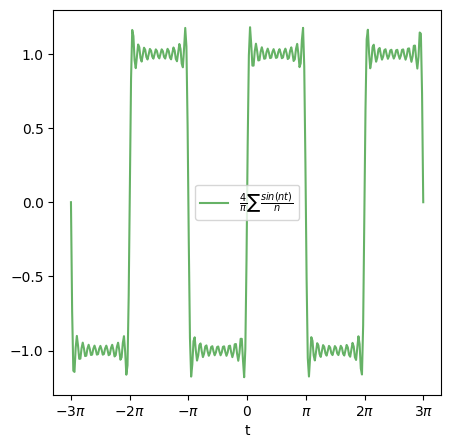

In [3]:
fig,axes=plt.subplots(figsize=(5,5))
l,=axes.plot(t,y,color='green',label='$\\frac{4}{\pi}\sum \\frac{sin(nt)}{n}$')
l.set_alpha(0.6)
axes.legend()
axes.set_xticks([-3*np.pi,-2*np.pi,-1*np.pi,0,np.pi,2*np.pi,3*np.pi],
                ['$-3\pi$','$-2\pi$','$-\pi$','$0$','$\pi$','$2\pi$','$3\pi$'])
axes.set_xlabel('t')

## 计算傅里叶系数

In [37]:
def SimpsonsApprox(f,a,b,n):
    
    if n%2==1:
        raise "n must be even"
    x=np.linspace(a,b,n+1)
    dx=(b-a)/n
    y=f(x)
    
    C=n//2  #抛物线的段数
    weight=[1,4]
    weight.extend([2,4]*(C-1))
    weight.append(1)
    
    r=np.sum(y*np.array(weight))*dx*2/6
    return r

In [43]:
density=0.1
#这里 density太高，会导致计算不准确，为什么？
N=int(2*np.pi/density)
if N%2:
    N+=1
print(N)

62


In [44]:
order=20
bn=[]
for n in range(1,order):
    f=lambda x: x*np.sin(n*x)
    bn.append(SimpsonsApprox(f,-np.pi,np.pi,N)/np.pi)

In [45]:
#傅里叶近似 x(),D in [-pi,pi]
y=0
t=np.linspace(-3*np.pi,3*np.pi,300)
for n in range(1,order):
    y+=bn[n-1]*np.sin(n*t)

Text(0.5, 0, 't')

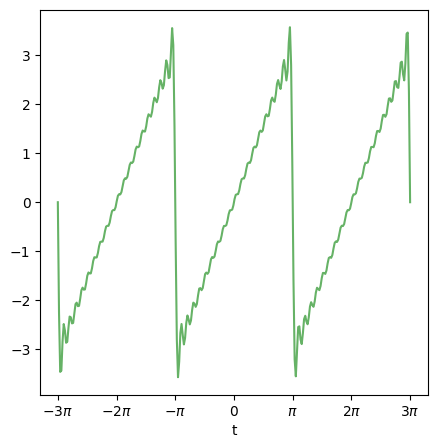

In [46]:
fig,axes=plt.subplots(figsize=(5,5))
l,=axes.plot(t,y,color='green')
l.set_alpha(0.6)
axes.set_xticks([-3*np.pi,-2*np.pi,-1*np.pi,0,np.pi,2*np.pi,3*np.pi],
                ['$-3\pi$','$-2\pi$','$-\pi$','$0$','$\pi$','$2\pi$','$3\pi$'])
axes.set_xlabel('t')

$$ x^{''}+2px^{'}+\omega_{n}^{2}x=f(t) $$

In [56]:
p=0
omega=12
y=0

# 对于所有的[-pi,pi]的周期函数，cn是一直到，这里特殊情况，只计算偶数项
cn=[]
for n in range(1,21,2):
    fac=1/(omega**2-(n*np.pi)**2)
    cn.append(fac)

In [67]:
y=0
t=np.linspace(-3*np.pi,3*np.pi,300)
bn=[]
for n in range(1,21,2):
    bn.append((4/np.pi)/n)

xn=[]
for c,b in zip(cn,bn):
    xn.append(c*b)
# 分别对应于sinx,sin3x,sin5x的系数
print(xn)

[0.009492550432360788, 0.007692329053569741, -0.0024785637165419764, -0.0005355879797327682, -0.0002158420322254681, -0.00011021387374720204, -6.426763261345751e-05, -4.0874575443177635e-05, -2.765425189708322e-05, -1.960047813749812e-05]
